# Multivariate views on complex datasets

https://seaborn.pydata.org/tutorial/introduction.html#multivariate-views-on-complex-datasets

여러 종류의 그래프가 결합된 형태의 그래프 소개   
   
``jointplot()``   

* 단일 관계에 집중   
* 각 변수의 주변 분포와 두 변수 간의 결합 분포 표현

In [1]:
import seaborn as sns

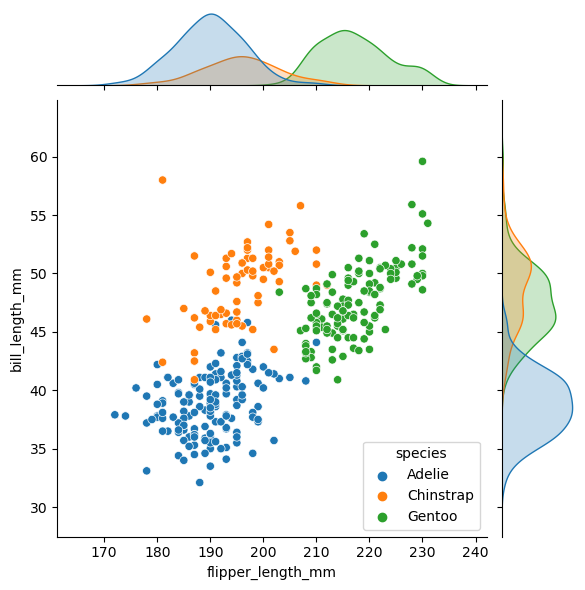

In [2]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

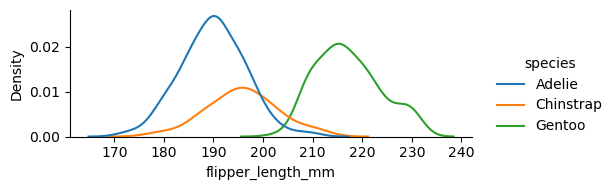

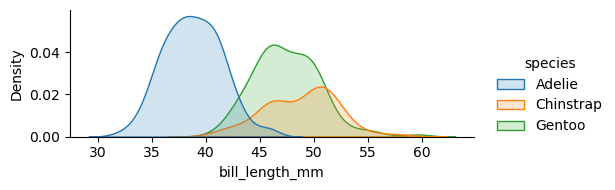

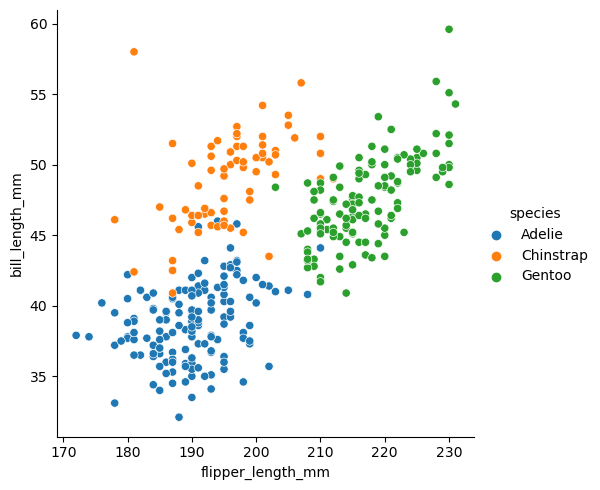

In [3]:
# displot - kde 와 relplot - scatter 의 조합
# 각각의 플롯 직접 그려보기 > kde 하나 그리는데 아직 바로바로 안나오고 헤맨다. 앞으로도 나올 예제들 직접 그려보는 연습해보자

# kde 플롯 1
sns.displot(penguins, x = 'flipper_length_mm', hue = 'species', kind = 'kde', height = 2, aspect=2.5)

# kde 플롯 2
# fill: 선아래 색 채우기, alpha: 채운 색 투명도
sns.displot(penguins, x = 'bill_length_mm', hue = 'species', kind = 'kde', height = 2, aspect=2.5, fill = True, alpha = .2)

# scatter 플롯
sns.relplot(penguins, x = 'flipper_length_mm', y = 'bill_length_mm', hue = 'species', sizes = (245, 65))

In [4]:
# 펭귄 측정 데이터
# 종, 서식지, 부리 길이(앞뒤), 부리 깊이(위아래), 날개 길이, 체중, 성별 데이터
display(penguins.sample(5))
print(penguins.info())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
239,Gentoo,Biscoe,48.7,15.1,222.0,5350.0,Male
189,Chinstrap,Dream,52.0,20.7,210.0,4800.0,Male
75,Adelie,Torgersen,42.8,18.5,195.0,4250.0,Male
236,Gentoo,Biscoe,42.0,13.5,210.0,4150.0,Female
319,Gentoo,Biscoe,51.1,16.5,225.0,5250.0,Male


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


대체로 다 그룹화가 잘 되어 나타나지만 flipper_length_mm와 bill_depth_mm를 봤을 땐, 아델리펭귄과 친스트랩펭귄의 차이가 별로 없다.

`` pairplot()``   
   
* 더 넓은 관점   
* 모든 쌍별 관계(pairwise relationships)와 각 변수에 대한 결합분포, 주변 분포 표현

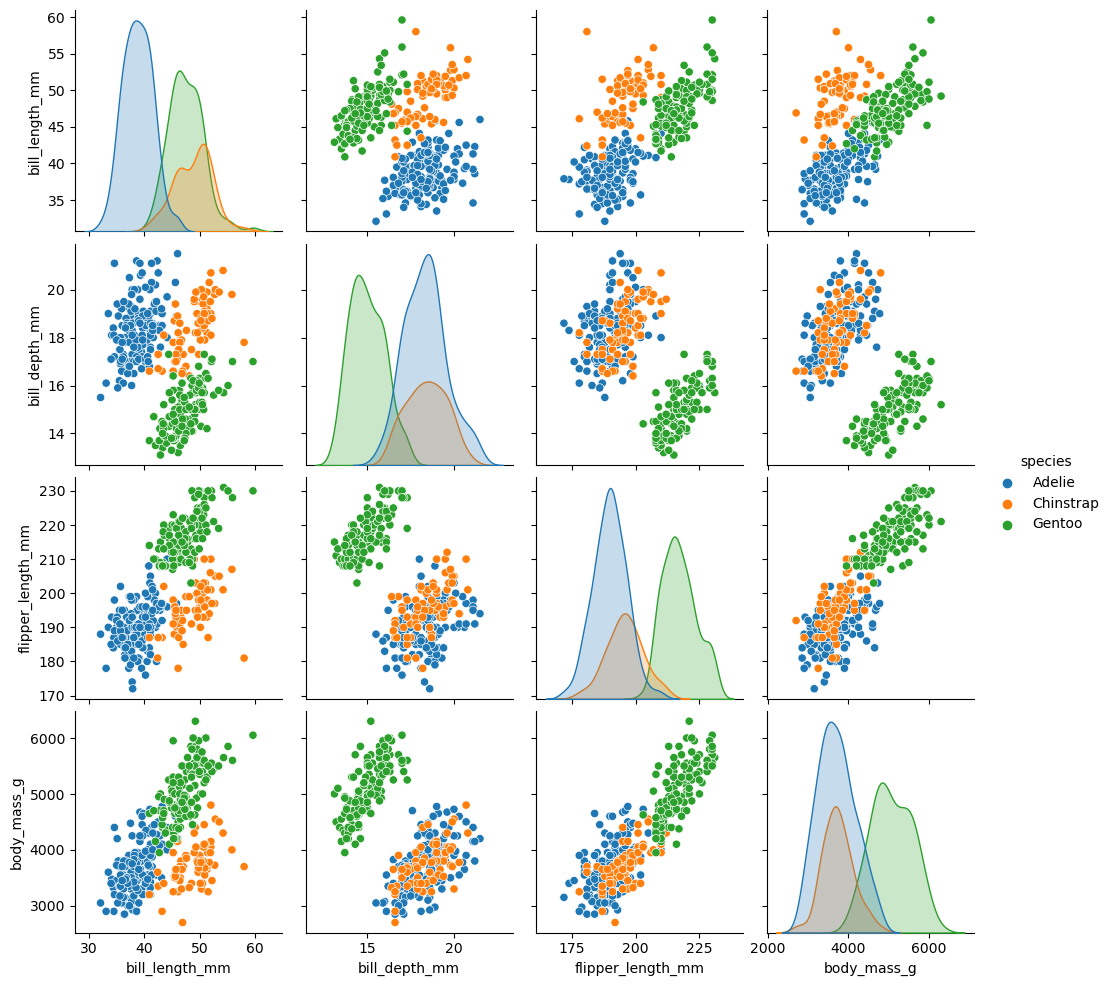

In [5]:
sns.pairplot(data=penguins, hue="species")

## Lower-level tools for building figures

* 플롯 도구
* 레이아웃 관리 도구   

위와 같은 lower-level 도구들을 결합해 축 그리드(grid of axes)* 에 연결해 복잡한 데이터 플롯을 그릴 수 있다.

*차후 Multi-plot grids 항목에서 상세히 다룸

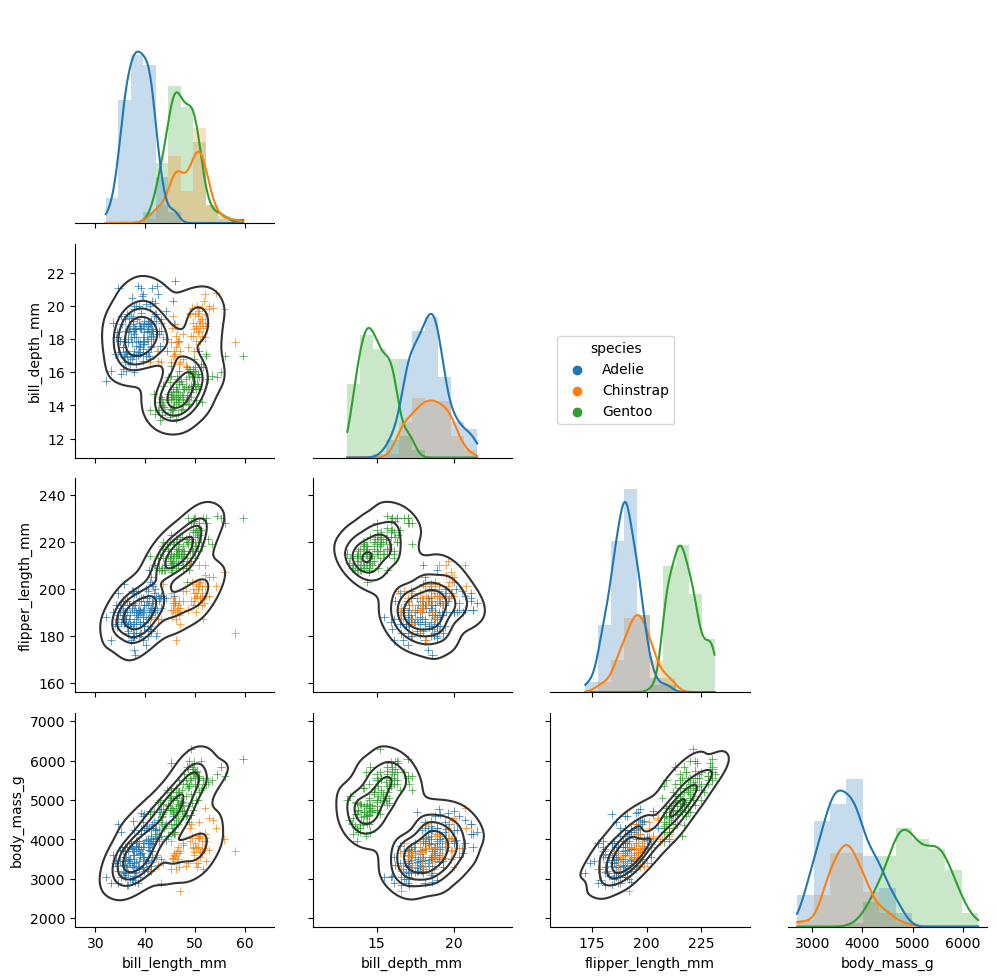

In [6]:
g = sns.PairGrid(penguins, hue="species", corner=True) # 색깔별로 종 구분, corner : 대각선 위 쪽 출력 안함
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2") # 등고선 형태로 나타난 그래프, level : 선 개수, color : 검정 0 ~ 1 하양
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True) # 대각선 위에 일변량 함수 출력, element: 히스토그램 형태 관련 속성(bars, step, poly)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

## <b><span style='color: #D60958'> 요약 </span></b>   
   
   * jointplot   
   * pairplot   
   * kde, scatter, hist   
